# Stellar Formation Time at $z=0$

In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic
from binned_stats import get_binned_statistic
from auriga.snapshot import Snapshot
from auriga.images import figure_setup, set_axs_configuration
from auriga.paths import Paths
from auriga.parser import parse
from auriga.settings import Settings

In [6]:
figure_setup()

In [3]:
def read_data(simulation: str) -> np.ndarray:
    s = Snapshot(simulation="au6_or_l4_s127", loadonlytype=[4])

    is_real_star = (s.type == 4) & (s.stellar_formation_time > 0)
    is_main_obj = (s.halo == s.halo_idx) & (s.subhalo == s.subhalo_idx)
    return s.stellar_formation_time[is_real_star & is_main_obj]

In [44]:
def plot_stellar_form_time_hist(simulations: list):
    """
    Plot a histogram of the stellar formation times (in units of expansion
    factor) for the simulations today.

    Parameters
    ----------
    simulations : list
        A list of simulations.
    """    

    fig = plt.figure(figsize=(2.0, 2.0))
    gs = fig.add_gridspec(nrows=1, ncols=1, hspace=0.0, wspace=0.0)
    ax = gs.subplots(sharex=True, sharey=True)

    ax.grid(True, ls='-', lw=0.25, c='silver')
    ax.tick_params(which='both', direction="in")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 2.5)
    # ax.set_xticks([2, 4, 6, 8, 10, 12, 14])
    # ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.set_xlabel('Stellar Formation Time [$a$]')
    ax.set_ylabel('PDF')
    ax.set_axisbelow(True)

    for simulation in simulations:
        data = read_data(simulation=simulation)
        ax.hist(data, bins=20, range=(0, 1),
                histtype="stepfilled", facecolor="tab:blue",
                alpha=0.75, lw=0,
                density=True)

        ax.text(x=0.95, y=0.95, size=6.0,
            s=r"$\texttt{" + simulation.upper() + "}$",
            ha='right', va='top', transform=ax.transAxes)

    plt.show()

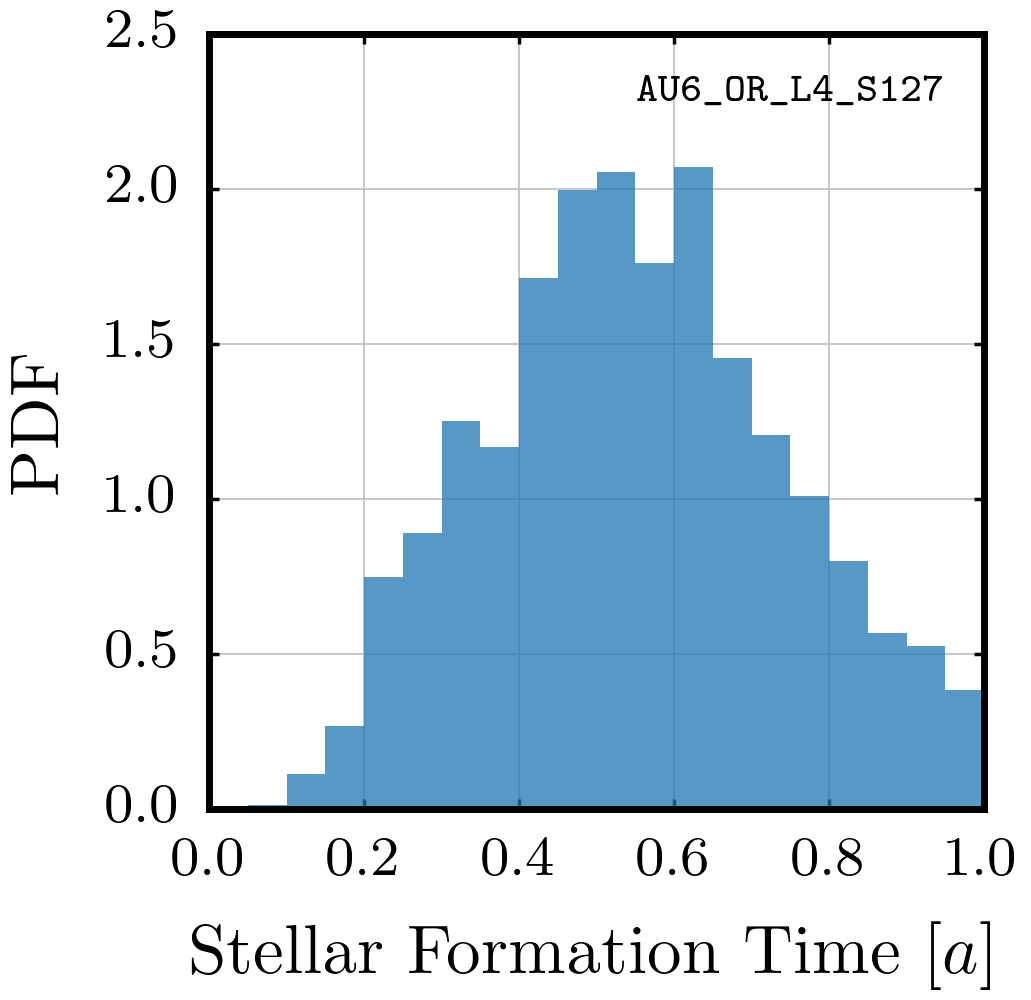

In [45]:
plot_stellar_form_time_hist(simulations=["au6_or_l4_s127"])